## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

/Users/garyliang/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)
# 建立模型
clf = DecisionTreeClassifier(       # default case
    criterion = "gini",             # "gini" for gini impurity, "entropy" for information gain
    splitter = "best",              # "best" to choose the best split, "random" to choose the best random split
    max_depth = None,               # maximum depth. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. 
    min_samples_split = 2,          # minimum number of samples required to split. If int, consider as the minimum number. If float, consider as a fraction
    min_samples_leaf = 1,           # minimum number of samples to be at a leaf node. If int, consider as the minimum number. If float, consider as a fraction
    min_weight_fraction_leaf = 0.,  # minimum weighted fraction of the sum total of weights (of all the input samples) 
    max_features = None,            # number of features to consider: int ,float, "auto", "sqrt", "log2", None
    random_state = None,            # If int, random_state is the seed used by the random number generator. If RandomState instance, random_state is the random number generator. If None, the random number generator is the RandomState instance used by np.random.
    max_leaf_nodes = None,          # Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
    min_impurity_decrease = 0.,     # A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
    min_impurity_split = 1e-7,      # Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
    class_weight = None,            # Weights associated with classes in the form {class_label: weight}
    presort = False                 # Whether to presort the data to speed up the finding of best splits in fitting
    )
# 訓練模型
clf.fit(x_train, y_train)
# 預測測試集
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print("Feature List: ", iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
Feature List:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.01796599 0.05992368 0.92211033]


/Users/garyliang/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


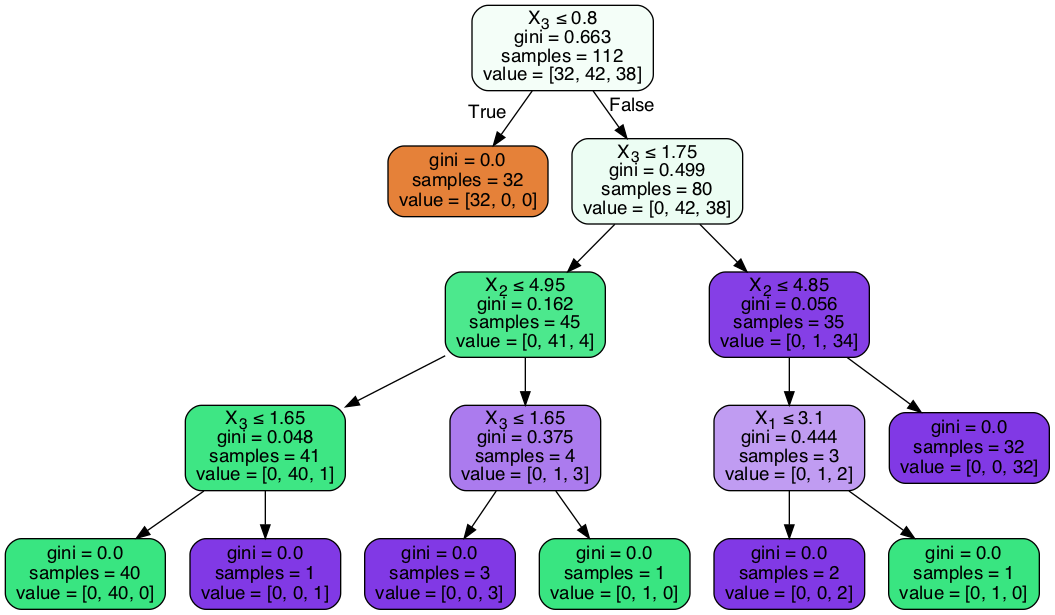

In [3]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [4]:
clf = DecisionTreeClassifier(
        criterion = "entropy",
        splitter = "random",
    )
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print("Feature List: ", iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
Feature List:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.05236741 0.03398949 0.32248453 0.59115857]


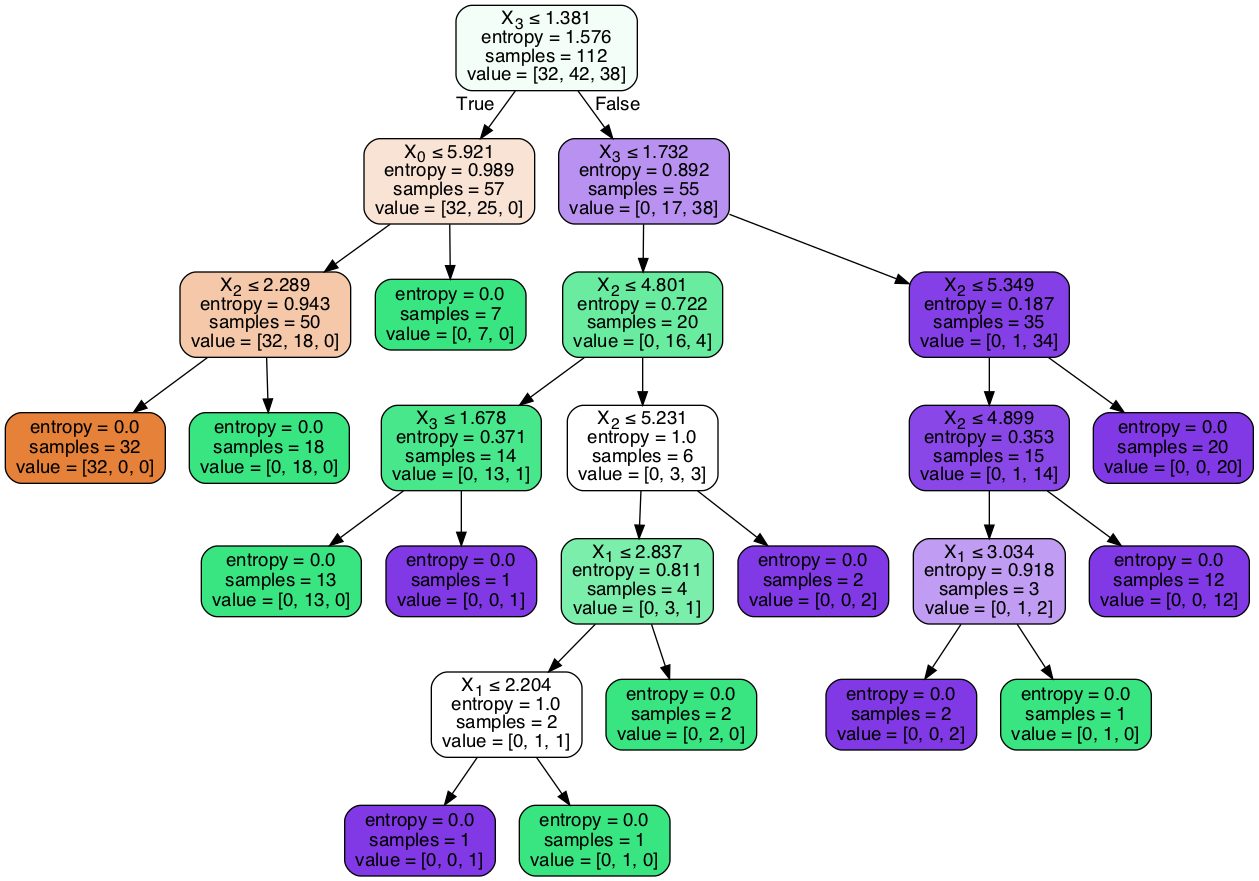

In [5]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [6]:
wine = datasets.load_wine()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print("Feature List: ", iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
Feature List:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.01796599 0.         0.52229134 0.45974266]


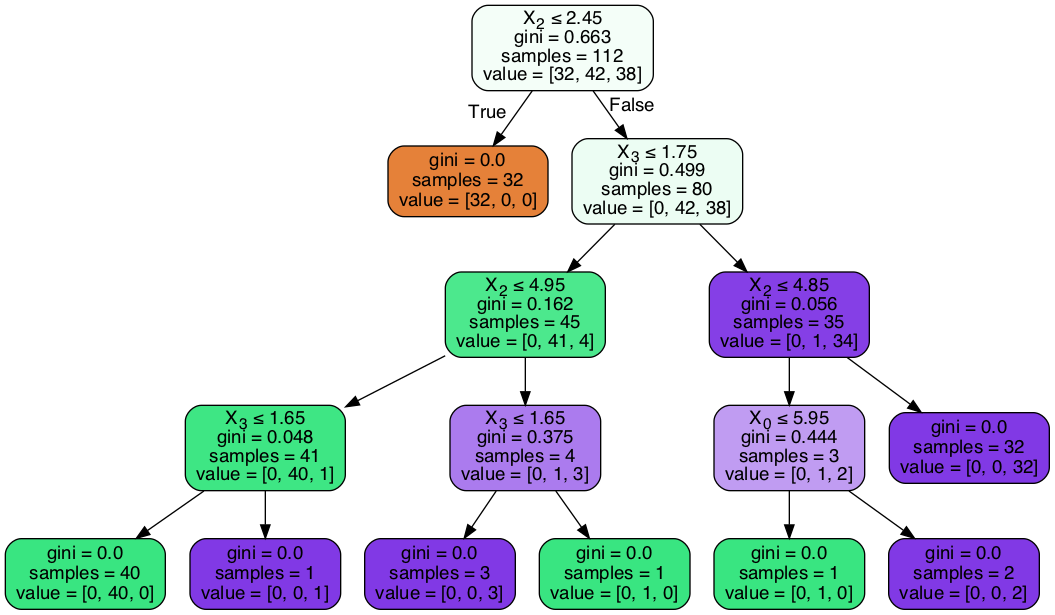

In [7]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [8]:
clf = DecisionTreeClassifier(
        criterion = "entropy",
        splitter = "random",
    )
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print("Feature List: ", iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
Feature List:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.0470165  0.02487101 0.84188916 0.08622332]


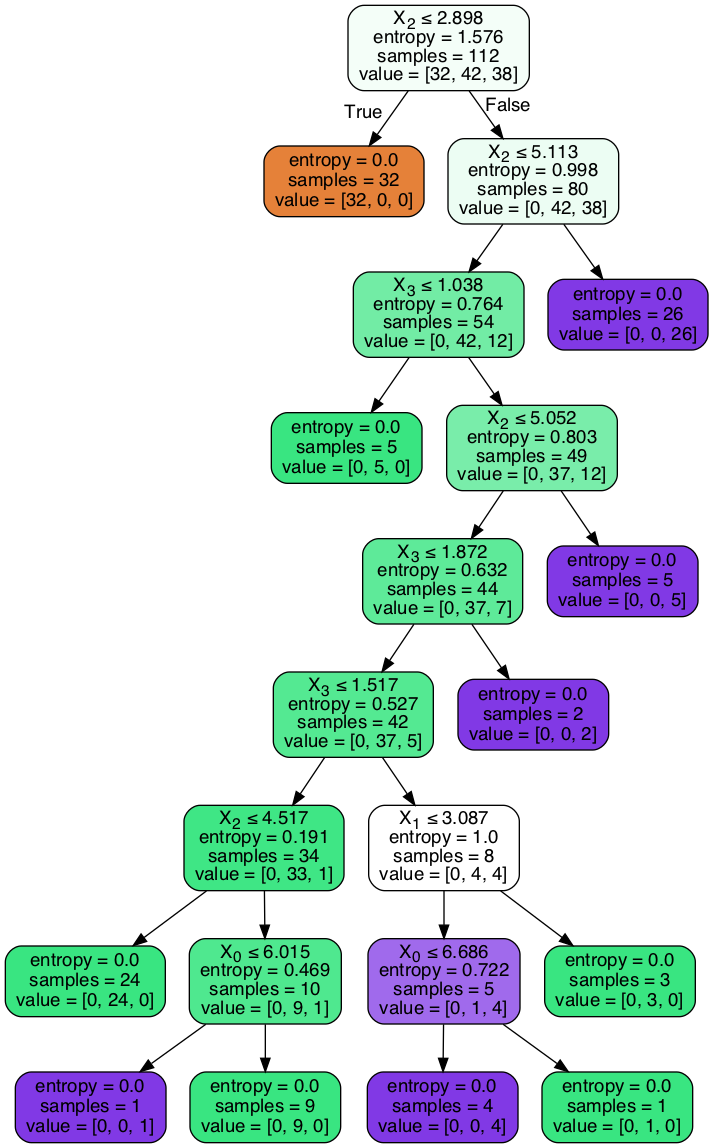

In [9]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())